# Neural Network Assignment By Rasha

### Import the needed packages

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### **Attribute Information**
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

### Get the dataset

In [2]:
dataset = pd.read_csv('heart.csv')

dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [158]:
print('\033[1m' + '------------------ Shape ------------------' + '\033[0m')
print(dataset.shape)
print('\033[1m' + '------------------ Types ------------------' + '\033[0m')
print(dataset.dtypes)
print('\033[1m' + '------------------ Head ------------------' + '\033[0m')
print(dataset.head())
print('\033[1m' + '------------------ Tail ------------------' + '\033[0m')
print(dataset.head())
print('\033[1m' + '--------------- Unique Elements ---------------' + '\033[0m')
print(dataset.nunique())
print('\033[1m' + '------------------ NA ------------------' + '\033[0m')
print(dataset.isnull().sum())
print('\033[1m' + '------------------ Quantiles ------------------' + '\033[0m')
print(dataset.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
print('\033[1m' + '------------------ Sample ------------------' + '\033[0m')
print(dataset.sample(5))

------------------ Shape ------------------
(918, 12)
------------------ Types ------------------
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
------------------ Head ------------------
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [152]:
# see the distrubution of heart disesed 
dataset.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [153]:
# see the distrubution of gender
dataset.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [154]:
# see the distrubution of Age
dataset.Age.value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

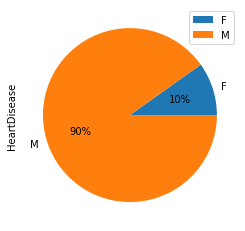

In [181]:
## EDA
dataset.groupby(['Sex']).sum().plot( kind='pie', y='HeartDisease', autopct='%1.0f%%')

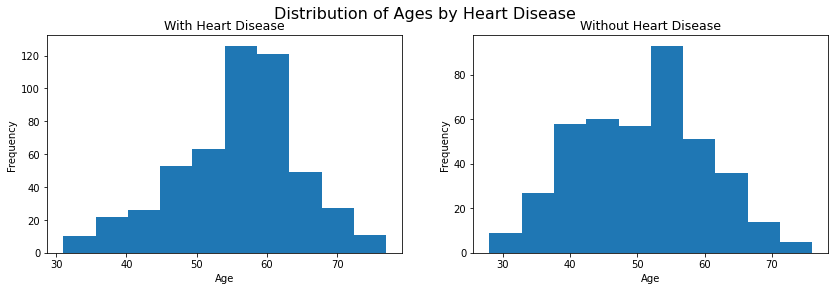

In [162]:
group = dataset.groupby(by='HeartDisease')
heart_disease = group.get_group(1)
without_heart_disease = group.get_group(0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

ax1 = heart_disease['Age'].plot(kind='hist', ax=axs[0])
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel("Age")

ax2 = without_heart_disease['Age'].plot(kind='hist', ax=axs[1])
ax2.set_title('Without Heart Disease', size=12.5)
ax2.set_xlabel("Age")


fig.suptitle('Distribution of Ages by Heart Disease', size=16, c='#000')
plt.show()

In [180]:
fig = px.bar(dataset, x="HeartDisease", y="RestingBP", barmode="group", color="Age", facet_col="Sex")
fig

In [7]:
# Feature set 
# The target will not be included 
X = dataset.iloc[:, :-1]

# The target will be the last column
y = dataset.iloc[:, -1]

In [8]:
# Encoding categorical features
## I use the Label encoder because it's will not add more columns to the dataset and more simple to run

le = LabelEncoder()
cols = X.columns.tolist()
for column in cols:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

In [9]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [10]:
pd.DataFrame(X)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


### Splitting the dataset into the Training set and Test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [18]:
history = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 4ms/step - loss: 0.7370 - accuracy: 0.4918
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.5177
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6454 - accuracy: 0.6213
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.7289
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5686 - accuracy: 0.7738
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5323 - accuracy: 0.7970
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.8106
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.8243
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4440 - accuracy: 0.8324
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy: 0.8392
Epoch 11/

In [19]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


### Plot your model’s training history.

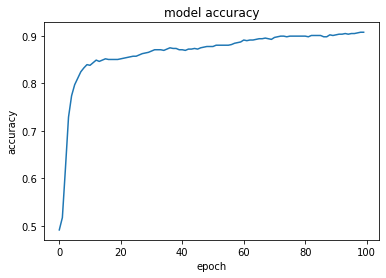

In [20]:
# plot history for accuracy  
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

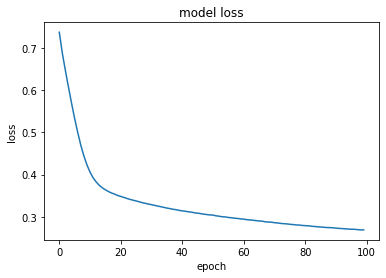

In [21]:
# plot history for loss  
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Predicting the Test set results

In [22]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 5ms/step


### Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        77
           1       0.84      0.90      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



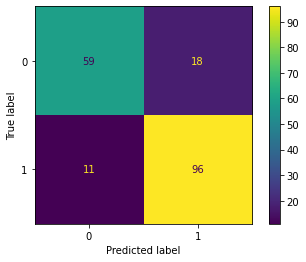

In [23]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

# **Try 2 more versions of it with different numbers of layers and neurons**

In [24]:
#second ann obj
ann2 = tf.keras.models.Sequential()

In [25]:
ann2.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [26]:
ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [27]:
ann2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
history2 = ann2.fit(X_train, y_train.values, batch_size = 64, epochs = 120) # I change the batch size and epochs numbers

Epoch 1/120
12/12 [==============================] - 1s 3ms/step - loss: 0.8451 - accuracy: 0.4292
Epoch 2/120
12/12 [==============================] - 0s 5ms/step - loss: 0.8089 - accuracy: 0.4523
Epoch 3/120
12/12 [==============================] - 0s 4ms/step - loss: 0.7757 - accuracy: 0.4741
Epoch 4/120
12/12 [==============================] - 0s 4ms/step - loss: 0.7452 - accuracy: 0.4946
Epoch 5/120
12/12 [==============================] - 0s 8ms/step - loss: 0.7176 - accuracy: 0.5245
Epoch 6/120
12/12 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.5490
Epoch 7/120
12/12 [==============================] - 0s 8ms/step - loss: 0.6676 - accuracy: 0.5777
Epoch 8/120
12/12 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.6076
Epoch 9/120
12/12 [==============================] - 0s 9ms/step - loss: 0.6230 - accuracy: 0.6431
Epoch 10/120
12/12 [==============================] - 0s 8ms/step - loss: 0.6024 - accuracy: 0.6717
Epoch 11/

In [29]:
y_pred2 = ann2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

6/6 [==============================] - 0s 5ms/step


              precision    recall  f1-score   support

           0       0.86      0.79      0.82        77
           1       0.86      0.91      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



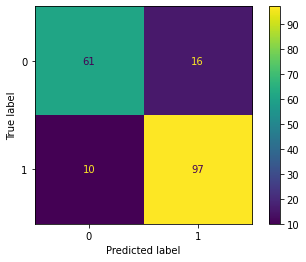

In [30]:
cm2 = confusion_matrix(y_test, y_pred2)

print(classification_report(y_test, y_pred2))


disp = ConfusionMatrixDisplay(confusion_matrix=cm2)

disp = disp.plot()

plt.show() ## the accuracy here increased a bit

### Try the Third ANN Object with different layers and neurons

In [143]:
#third ann obj
ann3 = tf.keras.models.Sequential()

In [144]:
# first hidden layer
ann3.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [145]:
# second hidden layer
ann3.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [146]:
# third hidden layer
ann3.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [147]:
# The output layer
ann3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [148]:
ann3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [149]:
history3 = ann2.fit(X_train, y_train.values, batch_size = 128, epochs = 160) # I change the batch size and epochs numbers

Epoch 1/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9169
Epoch 2/160
6/6 [==============================] - 0s 5ms/step - loss: 0.2333 - accuracy: 0.9169
Epoch 3/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9169
Epoch 4/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9169
Epoch 5/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9169
Epoch 6/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9169
Epoch 7/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9169
Epoch 8/160
6/6 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9169
Epoch 9/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9183
Epoch 10/160
6/6 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9183
Epoch 11/160
6/6 [===========

In [150]:
y_pred3 = ann3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)

6/6 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.75      0.16      0.26        77
           1       0.61      0.96      0.75       107

    accuracy                           0.62       184
   macro avg       0.68      0.56      0.50       184
weighted avg       0.67      0.62      0.54       184



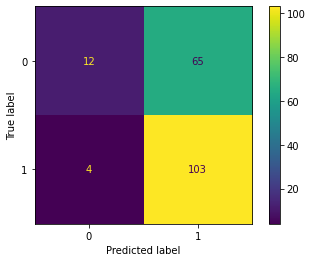

In [151]:
cm3 = confusion_matrix(y_test, y_pred3)

print(classification_report(y_test, y_pred3))


disp = ConfusionMatrixDisplay(confusion_matrix=cm3)

disp = disp.plot()

plt.show() ## the accuracy here decreased a lot when I add third 3rd layer and the class-0 predict FN more than the FP